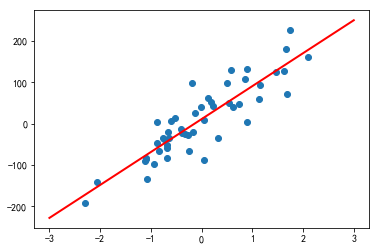




代码运行结果：
直线方程为：y = 79 * x + 10


In [35]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import numpy as np
X,y = make_regression(n_samples=50,n_features=1,n_informative=1,noise=50,random_state=1)
reg = LinearRegression()
reg.fit(X,y)
z = np.linspace(-3,3,200).reshape(-1,1)
plt.plot(z,reg.predict(z),'r-',lw=2)
plt.scatter(X,y)
plt.show()
print('\n\n\n代码运行结果：')
print('======================')
print('直线方程为：y = %d * x + %d' % (reg.coef_[0],reg.intercept_))


(442, 10)


代码结果如下：
训练数据集得分为：0.530
测试数据集得分为：0.459


代码结果如下：
训练数据集得分为：0.433
测试数据集得分为：0.433


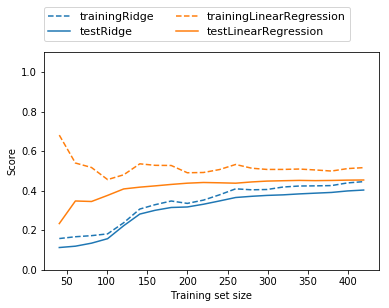

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve,KFold
X,y = load_diabetes().data,load_diabetes().target
print(X.shape)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=8)
lr = LinearRegression().fit(X_train,y_train)
print('\n\n代码结果如下：')
print('====================')
print('训练数据集得分为：{:.3f}'.format(lr.score(X_train,y_train)))
print('测试数据集得分为：{:.3f}'.format(lr.score(X_test,y_test)))

ridge = Ridge().fit(X_train,y_train)
print('\n\n代码结果如下：')
print('====================')
print('训练数据集得分为：{:.3f}'.format(ridge.score(X_train,y_train)))
print('测试数据集得分为：{:.3f}'.format(ridge.score(X_test,y_test)))

def plot_learning_curve(est,X,y):  ##学习曲线函数的定义
    training_set_size,train_scores,test_scores = learning_curve(est,X,y,train_sizes=np.linspace(0.1,1,20),cv=KFold(20,shuffle=True,random_state=1))
    estimator_name = est.__class__.__name__
    line = plt.plot(training_set_size,train_scores.mean(axis=1),'--',label='training'+estimator_name)
    plt.plot(training_set_size,test_scores.mean(axis=1),'-',label='test'+estimator_name,c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.ylabel('Score')
    plt.ylim(0,1.1)

plot_learning_curve(Ridge(alpha=1),X,y)
plot_learning_curve(LinearRegression(),X,y)
plt.legend(loc=(0,1.05),ncol=2,fontsize=11)

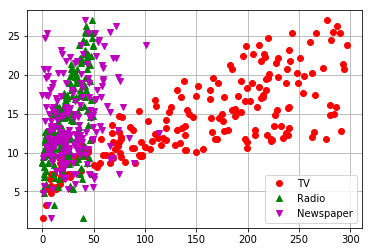

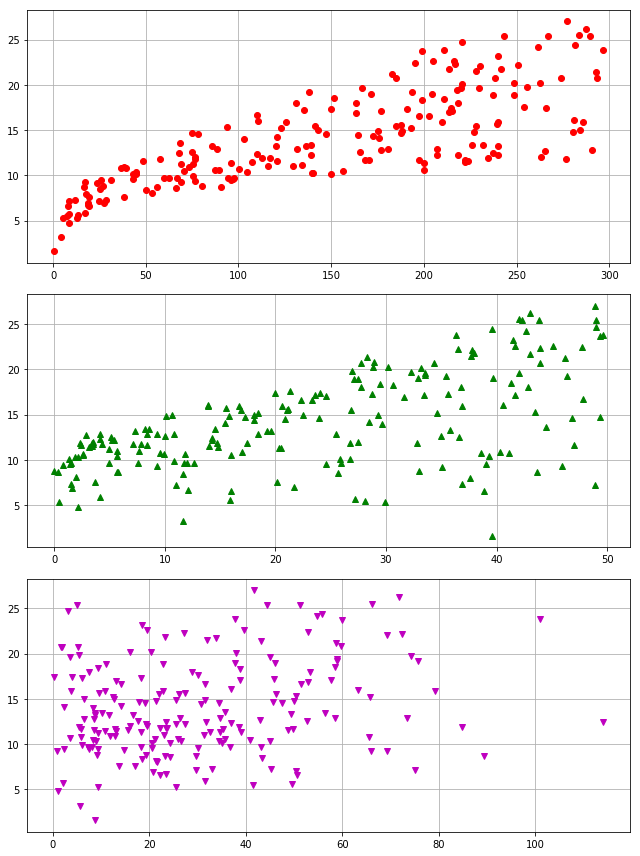

拟合的回归直线的系数为：0.05
拟合的回归直线的截距项为：2.88
训练数据的得分为： 0.890307557755665
测试数据的得分为： 0.9156213613792233


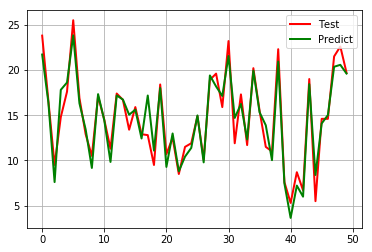

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
path = '8.Advertising.csv'
data = pd.read_csv(path)
x = data[['TV','Radio','Newspaper']]
y = data['Sales']
plt.plot(data['TV'],y,'ro',label='TV')
plt.plot(data['Radio'],y,'g^',label='Radio')
plt.plot(data['Newspaper'],y,'mv',label='Newspaper')
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.figure(figsize=(9,12))
plt.subplot(311)
plt.plot(data['TV'],y,'ro')
plt.grid()
plt.subplot(312)
plt.plot(data['Radio'],y,'g^')
plt.grid()
plt.subplot(313)
plt.plot(data['Newspaper'],y,'mv')
plt.grid()
plt.tight_layout()
plt.show()

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)
reg = LinearRegression().fit(x_train,y_train)
print('拟合的回归直线的系数为：{:.2f}'.format(reg.coef_[0]))
print('拟合的回归直线的截距项为：{:.2f}'.format(reg.intercept_))
print('训练数据的得分为：',reg.score(x_train,y_train))
print('测试数据的得分为：',reg.score(x_test,y_test))

y_hat = reg.predict(np.array(x_test))
t = np.arange(len(x_test))
plt.plot(t,y_test,'r-',lw=2,label='Test')
plt.plot(t,y_hat,'g-',lw=2,label='Predict')
plt.legend(loc='upper right')
plt.grid()
plt.show()

验证参数： {'alpha': 0.0001}
训练数据集的得分为： 0.8901498098117536
测试数据集的得分为： 0.9176214939647042


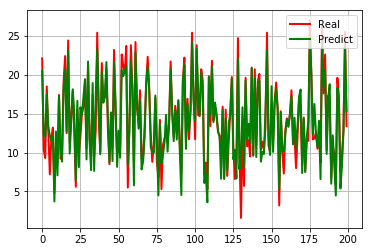

In [4]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('8.Advertising.csv')
x = data[['TV','Radio']]
y = data['Sales']

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)
ridge = Ridge()

alpha_can = np.logspace(-4,2,10)
ridge_model = GridSearchCV(ridge,param_grid={'alpha':alpha_can},cv=5)
ridge_model.fit(x_train,y_train)
print('验证参数：',ridge_model.best_params_)

y_hat = ridge_model.predict(x)
print('训练数据集的得分为：',ridge_model.score(x_train,y_train))
print('测试数据集的得分为：',ridge_model.score(x_test,y_test))

t = np.arange(len(y))
plt.plot(t,y,'r-',lw=2,label='Real')
plt.plot(t,y_hat,'g-',lw=2,label='Predict')
plt.legend(loc='upper right')
plt.grid()
plt.show()



H:\anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype <U3 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[[-1.56873522 -1.4444497 ]
 [-1.56201162 -1.4444497 ]
 [-1.55528802 -1.4444497 ]
 ...
 [ 1.77289411  1.71090158]
 [ 1.77961771  1.71090158]
 [ 1.78634131  1.71090158]]


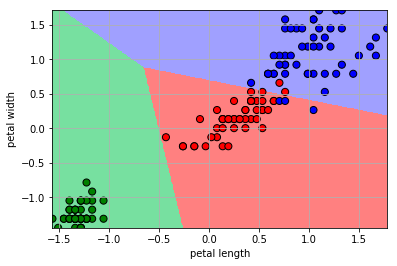

y_pre:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
y:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
result:
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  

In [25]:
from sklearn.linear_model import LogisticRegression
import matplotlib as mpl
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def iris_type(a):
    it = {'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
    return it[a]

path = '8.iris.data'
f = open(path)
x = []
y = []
for d in f:
    d = d.strip()
    if d:
        d = d.split(',')
        x.append(d[:-1])
        y.append(d[-1])
        
x = np.array(x)
y = np.array(y)
y[y == 'Iris-setosa'] = 0
y[y == 'Iris-versicolor'] = 1
y[y == 'Iris-virginica'] = 2

y = y.astype(dtype = np.int)

x = x[:,2:]
x = StandardScaler().fit_transform(x)
lr = LogisticRegression(C=10).fit(x,y.ravel())

N,M = 500,500
x1_min ,x1_max = x[:,0].min(), x[:,0].max()
x2_min ,x2_max = x[:,1].min(), x[:,1].max()
t1 = np.linspace(x1_min,x1_max,N)
t2 = np.linspace(x2_min,x2_max,M)
x1,x2 = np.meshgrid(t1,t2)
x_test = np.stack((x1.flat,x2.flat),axis=1)
print(x_test)

cm_light = mpl.colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_hat = lr.predict(x_test)
y_hat = y_hat.reshape(x1.shape)
plt.pcolormesh(x1,x2,y_hat,cmap=cm_light)
plt.scatter(x[:,0],x[:,1],c=y,edgecolors='k',s=50,cmap=cm_dark)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.show()

y_pre = lr.predict(x)
print('y_pre:\n',y_pre)
y = y.reshape(-1)
print('y:\n',y)
result = y_pre ==y
print('result:\n',result)
acc = np.mean(result)

print('准确度：%.2f%%' % (100*acc))

In [ ]:
#path = '8.iris.data'
#df =  pd.read_csv(path,header=0)
#x = df.values[:,:-1]
#y = df.values[:,-1]

#le = preprocessing.LabelEncoder()
#le.fit(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
#print(le.classes_)
#y = le.transform(y)
#y = np.array(y)



1次多项式的系数为： [-9.64898976 10.72446448]
得分为： 0.9762663398944462
2次多项式的系数为： [-4.66180081  5.02481997  0.94994075]
得分为： 0.9983836403272632
3次多项式的系数为： [-4.76156549  5.31144548  0.82325544  0.01407615]
得分为： 0.9983962840823901
4次多项式的系数为： [-4.46926926  3.28857002  2.54610198 -0.44782406  0.03849168]
得分为： 0.9986157654831446
5次多项式的系数为： [-4.20875162 -1.5686367   9.37745349 -3.67695632  0.65601498 -0.04116822]
得分为： 0.9991150446648379
6次多项式的系数为： [-4.1910539  -2.73432638 11.77831279 -5.39691231  1.20952386 -0.12320406
  0.00455755]
得分为： 0.9991247928338168
7次多项式的系数为： [ -4.24477782  17.24636397 -42.0681693   47.15488982 -23.38232049
   5.83279537  -0.71486631   0.03425828]
得分为： 0.9997476175713308
8次多项式的系数为： [  -4.23594765  -23.91614712   90.33624759 -114.64505883   76.56827232
  -28.48805701    5.92168094   -0.64143218    0.02815377]
得分为： 1.0
1次多项式的alph参数为：0.236449
系数为： [-8.65577326 10.46919411]
得分为： 0.9755961674596233
2次多项式的alph参数为：0.065793
系数为： [-4.34661676  4.78531462  0.98406682]
得分为： 0.99834256167

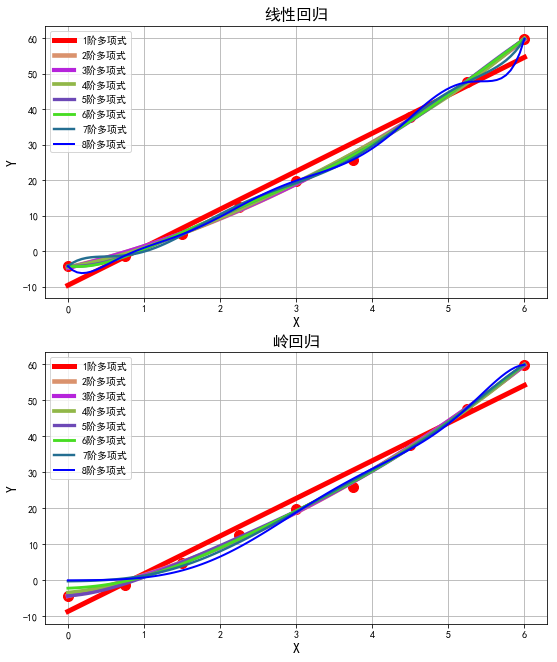

In [43]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

np.random.seed(0)
N = 9
x = np.linspace(0,6,N)
y = x**2 + 5*x - 6 + np.random.randn(N)
x.shape = -1,1
y.shape = -1,1
clrs = []  # 颜色
for c in np.linspace(16711680, 255, 8):
    clrs.append('#%06x' % int(c))
model1 = Pipeline([('poly',PolynomialFeatures()),('linear',LinearRegression(fit_intercept=False))])
model2 = Pipeline([('poly',PolynomialFeatures()),('linear',RidgeCV(alphas=np.logspace(-3,2,100),fit_intercept=False))])
models = model1,model2
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False
np.set_printoptions(suppress=True)

plt.figure(figsize=(9,11),facecolor='w')

linewidths = np.linspace(5,2,N-1)
titlt = u'线性回归',u'岭回归'

for t in range(2):
    model = models[t]
    plt.subplot(2,1,t+1)
    plt.plot(x,y,'ro',ms=10)
    
    for i in range(N-1):
        model.set_params(poly__degree=(i+1))
        model.fit(x,y)
        lin = model.get_params('linear')['linear']
        if t==0:
            print('%d次多项式的系数为：' % (i+1),lin.coef_.ravel())
        else:
            print('%d次多项式的alph参数为：%.6f\n系数为：' % ((i+1),lin.alpha_),lin.coef_.ravel())
        x_hat = np.linspace(0,6,100)
        x_hat.shape = -1,1
        y_hat = model.predict(x_hat)
        print('得分为：',model.score(x,y))
        plt.plot(x_hat,y_hat,color=clrs[i],lw=linewidths[i],label=('%d阶多项式'%(i+1)))
    plt.legend(loc='upper left')
    plt.grid()
    plt.title(titlt[t], fontsize=16)
    plt.xlabel('X', fontsize=14)
    plt.ylabel('Y', fontsize=14)
plt.show()